**Title** **of** **Project**: customer purchase prediction

**Objective**:The objective is to predict whether a customer will make a purchase based on attributes such as age, income, and spending score.

**Data Source**:For simplicity, we will use the make_classification dataset from sklearn to generate synthetic data for a customer purchase prediction scenario.

**Import Libraries:**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

Import Data:

In [10]:
# Generate synthetic data for customer purchases using sklearn's make_classification
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['age', 'income', 'spending_score', 'family_size', 'employment_years'])
df['purchase'] = y  # Target variable: whether the customer made a purchase (1 = yes, 0 = no)

# Display the first few rows
print(df.head())

        age    income  spending_score  family_size  employment_years  purchase
0 -0.065300 -0.717214        0.393952    -0.934473          1.681514         0
1  0.567015 -0.044606        1.612851    -1.350174          2.488878         0
2 -0.247215 -0.650569       -0.743500    -1.214190          0.841110         0
3  1.145870  0.974224        1.562506    -2.277010          2.276521         1
4  0.599605 -0.427545        2.374472    -1.503510          3.604959         0


Describe Data

In [11]:
# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of each column
print(df.dtypes)

               age       income  spending_score  family_size  \
count  1000.000000  1000.000000     1000.000000  1000.000000   
mean      0.195463     0.009486        0.482060    -0.501864   
std       0.670451     1.198626        1.284559     1.249826   
min      -2.696759    -3.950596       -3.778978    -3.837231   
25%      -0.163177    -0.953959       -0.199755    -1.311925   
50%       0.362265     0.207400        0.620635    -0.725516   
75%       0.610046     0.956974        1.371884     0.268259   
max       1.852260     2.860860        3.841188     4.619524   

       employment_years     purchase  
count       1000.000000  1000.000000  
mean           0.799633     0.495000  
std            1.690660     0.500225  
min           -5.639529     0.000000  
25%           -0.209345     0.000000  
50%            0.893711     0.000000  
75%            1.967214     1.000000  
max            5.585086     1.000000  
age                 0
income              0
spending_score      0
family

Data Visualization

<ipython-input-12-8d9b75eeabda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=df, palette='Set2')


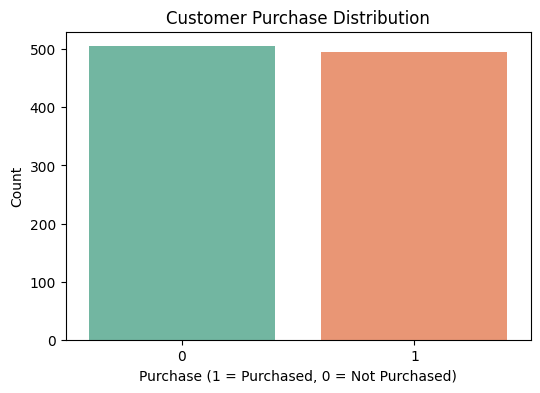

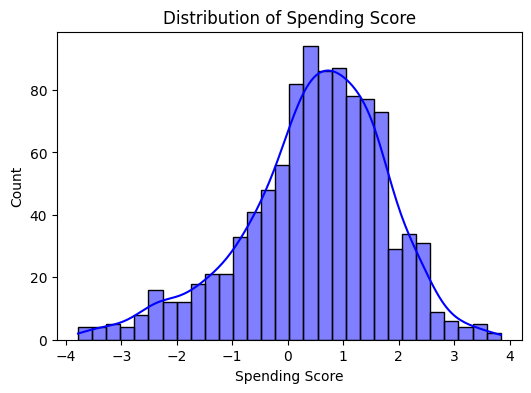

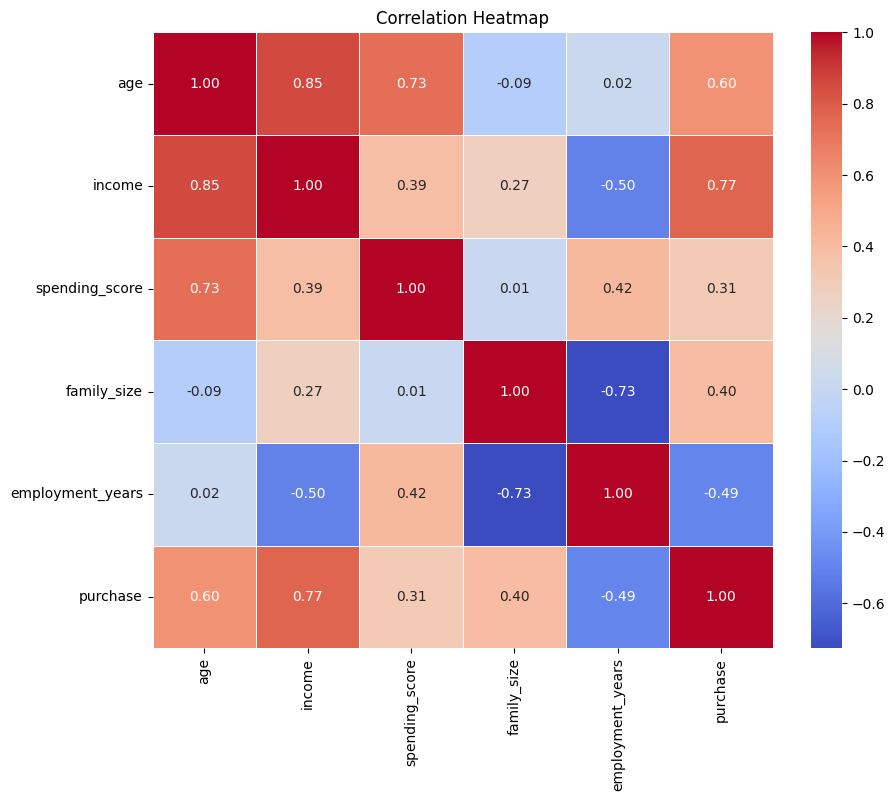

In [12]:
# Distribution of the target variable (purchase)
plt.figure(figsize=(6, 4))
sns.countplot(x='purchase', data=df, palette='Set2')
plt.title('Customer Purchase Distribution')
plt.xlabel('Purchase (1 = Purchased, 0 = Not Purchased)')
plt.ylabel('Count')
plt.show()

# Distribution of spending score
plt.figure(figsize=(6, 4))
sns.histplot(df['spending_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing:

In [13]:
# Standardize the feature variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('purchase', axis=1))

# Convert scaled data back to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=['age', 'income', 'spending_score', 'family_size', 'employment_years'])

Define Target Variable (y) and Feature Variables (X):

In [14]:
# Define feature matrix (X) and target variable (y)
X = X_scaled_df  # Features (standardized)
y = df['purchase']  # Target variable (purchase)

Train Test Split:

In [15]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling:

In [16]:
# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation:

Model Accuracy: 97.00%


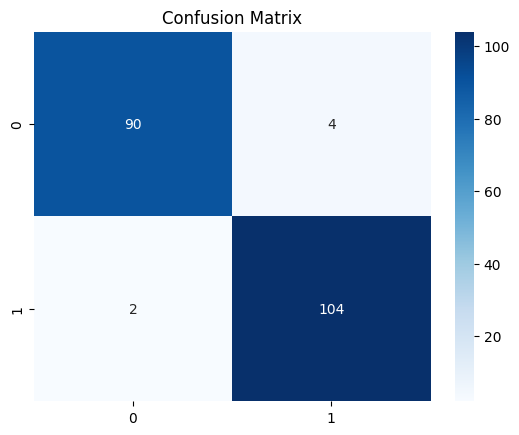

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.96      0.98      0.97       106

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

Prediction:

In [19]:
# Predict customer purchase for a new customer (example values)
new_customer = [[25, 50000, 60, 3, 5]]  # Example data: age, income, spending_score, family_size, employment_years
new_customer_scaled = scaler.transform(new_customer)  # Scale the new customer's data

predicted_purchase = model.predict(new_customer_scaled)

# Output the result
if predicted_purchase[0] == 1:
    print("Prediction: The customer is likely to make a purchase.")


Prediction: The customer is likely to make a purchase.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Explanation**:
**Objective**: To predict whether a customer will make a purchase based on attributes like age, income, and spending score.

**Data Source**: The dataset is generated synthetically using the make_classification function from sklearn.

**Data Preprocessing**: The data was scaled using StandardScaler to ensure the features are on the same scale.

**Modeling**:A RandomForestClassifier was used to model the prediction of whether a customer will make a purchase.

**Evaluation:** The model's performance was evaluated using accuracy, confusion matrix, and a classification report.

**Prediction**: A new customer's data was used to predict the likelihood of a purchase.